In [1]:
import model
import torch
import torch.nn as nn
import data_loader
import matplotlib.pyplot as plt
from torch.utils import data

In [2]:
path = r"C:\Users\user\Documents\dane\100Objects_train"
ds = data_loader.ObjectSegmentationDataset(path, os.path.join(path, "annotations.json"))
dl = data.DataLoader(ds, batch_size=1, shuffle=True)

In [31]:
import kornia.augmentation as a

apply_same = lambda im, mask, op: (op(im), op(mask, op._params))

class Augmentator(nn.Module):
    def __init__(self):
        super(Augmentator, self).__init__()
        # color transforms
        self.pixelwise = nn.Sequential(
            a.RandomGrayscale(p=0.1),
            a.RandomMotionBlur(kernel_size=7, angle=90, direction=.0)
        )
        # geometric transforms
        self.affine = a.RandomAffine(degrees=[-6, 6])
        self.center_crop = a.CenterCrop(size=(440, 600))
    
    def __call__(self, data):
        image_batch, mask_batch = data # unpack
        # color transforms
        image_batch = self.pixelwise(image_batch)
        # geometric transforms
        image_batch, mask_batch = apply_same(image_batch, mask_batch, self.affine)
        image_batch, mask_batch = apply_same(image_batch, mask_batch, self.center_crop)
        return image_batch, mask_batch


augmentator = Augmentator()

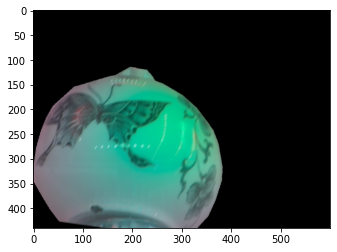

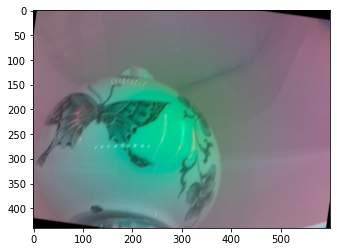

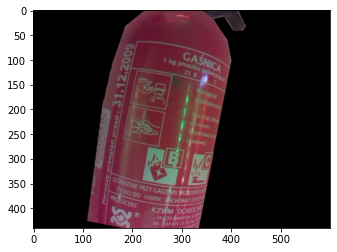

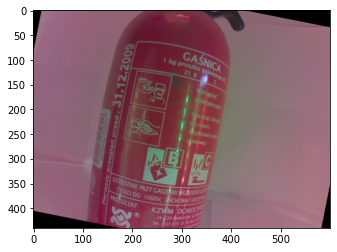

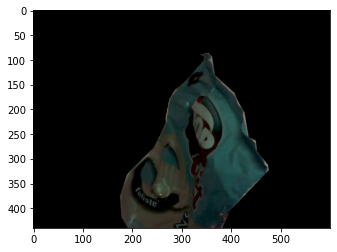

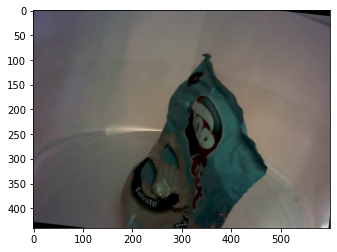

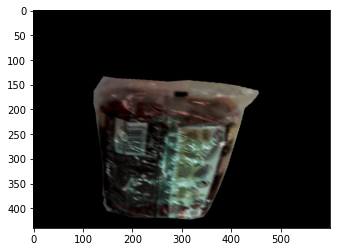

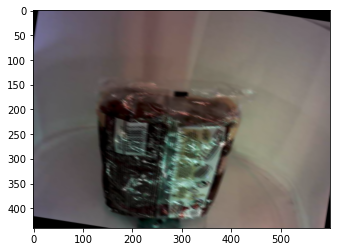

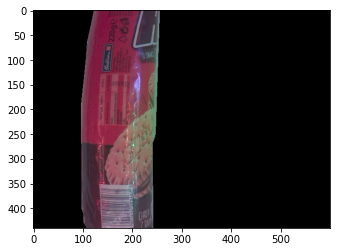

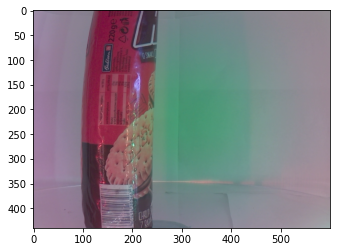

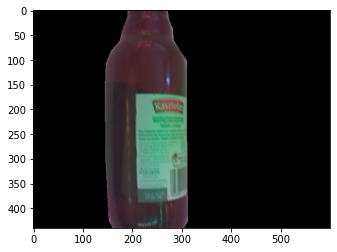

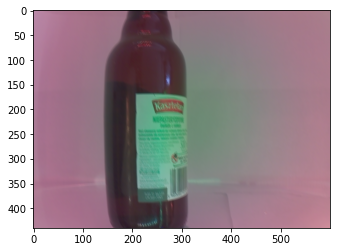

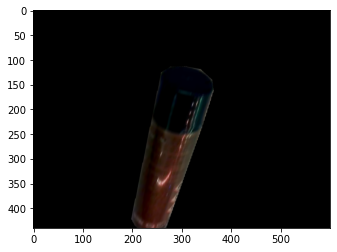

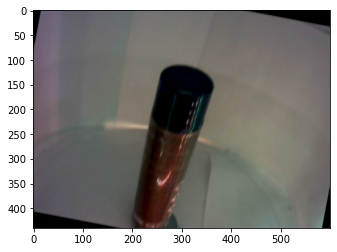

In [32]:
for n, data in enumerate(dl):
    data = augmentator(data)
    ims, masks = data
    plt.imshow((ims[0]*masks[0]).permute((1,2,0)))
    plt.show()
    plt.imshow((ims[0]).permute((1,2,0)))
    plt.show()
    if n > 5: break